<a href="https://colab.research.google.com/github/abhinavdayal/EIP4/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print (X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


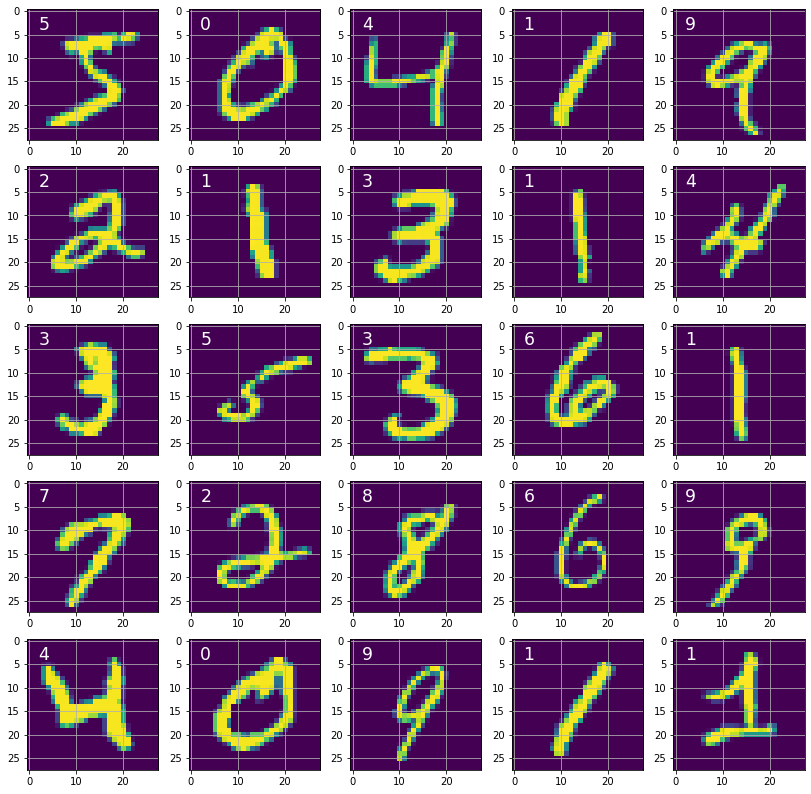

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
r, c = 5, 5
figmatrix = plt.figure(figsize=(14, 14))
for i in range(1, r*c+1):
  plt.subplot(r, c, i)
  plt.imshow(X_train[i-1])
  plt.grid(which="both")
  plt.text(2, 4, y_train[i-1], color="white", fontsize="xx-large")
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
from keras.layers import Activation
# let us do a test model
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(26,26,32)))
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(24,24,64)))
model.add(MaxPooling2D()) # do max pooling after seeing 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(26, 26, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(24, 24, 6...)`
  import sys


In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 10)        1290      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)               

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# as per class initially we assign random weights.
# https://keras.io/models/about-keras-models/#about-keras-models
initial_weights = model.get_weights() 

In [13]:
# let us see if batch_size has impact upon training.
for b in [1, 10, 32, 100, 600, 1000, 2000, 5000, 10000]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Epoch 1/1
60000/60000 [==============================] - 309s 5ms/step - loss: 0.1484 - acc: 0.9551
batch size = 1 accuracy = [0.0713699407744687, 0.9763]
Epoch 1/1
  180/60000 [..............................] - ETA: 53s - loss: 2.0446 - acc: 0.3167 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 32s 536us/step - loss: 0.1262 - acc: 0.9624
batch size = 10 accuracy = [0.06865261684004217, 0.9784]
Epoch 1/1
60000/60000 [==============================] - 11s 183us/step - loss: 0.1372 - acc: 0.9576
batch size = 32 accuracy = [0.05664653780274093, 0.9805]
Epoch 1/1
60000/60000 [==============================] - 6s 96us/step - loss: 0.2120 - acc: 0.9329
batch size = 100 accuracy = [0.0655535811807029, 0.9795]
Epoch 1/1
60000/60000 [==============================] - 4s 63us/step - loss: 0.7298 - acc: 0.7590
batch size = 600 accuracy = [0.15422186697870494, 0.9544]
Epoch 1/1
60000/60000 [==============================] - 4s 62us/step - loss: 1.1229 - acc: 0.6114
batch size = 1000 accuracy = [0.26645567961633204, 0.9226]
Epoch 1/1
60000/60000 [==============================] - 4s 65us/step - loss: 1.7398 - acc: 0.4315
batch size = 2000 accuracy = [0.41964152249097825, 0.8733]
Epoch 1/1
60000/60000 [==============================] - 5s 76us/

In [14]:
# So it seems from 32 to 100 is decreased and till that point it was increasing. Let us explore more.
for b in [40, 50, 60, 64, 70, 80]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Epoch 1/1
  680/60000 [..............................] - ETA: 16s - loss: 1.6458 - acc: 0.4765

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 10s 162us/step - loss: 0.1471 - acc: 0.9553
batch size = 40 accuracy = [0.05969142751358449, 0.9812]
Epoch 1/1
60000/60000 [==============================] - 8s 139us/step - loss: 0.1804 - acc: 0.9433
batch size = 50 accuracy = [0.07370615161573514, 0.9771]
Epoch 1/1
60000/60000 [==============================] - 8s 127us/step - loss: 0.1913 - acc: 0.9384
batch size = 60 accuracy = [0.0696611636120826, 0.9763]
Epoch 1/1
60000/60000 [==============================] - 7s 122us/step - loss: 0.2031 - acc: 0.9357
batch size = 64 accuracy = [0.06017186764460057, 0.9816]
Epoch 1/1
60000/60000 [==============================] - 7s 115us/step - loss: 0.2037 - acc: 0.9339
batch size = 70 accuracy = [0.06830269861267879, 0.9791]
Epoch 1/1
60000/60000 [==============================] - 6s 105us/step - loss: 0.2200 - acc: 0.9292
batch size = 80 accuracy = [0.07431254132892937, 0.9758]


In [15]:
# So it seems from 32 to 100 is decreased and till that point it was increasing. Let us explore more.
for b in [36, 48, 72, 96]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Epoch 1/1
  540/60000 [..............................] - ETA: 19s - loss: 2.2834 - acc: 0.2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 10s 173us/step - loss: 0.1645 - acc: 0.9489
batch size = 36 accuracy = [0.07126859587458893, 0.979]
Epoch 1/1
60000/60000 [==============================] - 8s 141us/step - loss: 0.1739 - acc: 0.9447
batch size = 48 accuracy = [0.05639408501479775, 0.9818]
Epoch 1/1
60000/60000 [==============================] - 7s 112us/step - loss: 0.2157 - acc: 0.9323
batch size = 72 accuracy = [0.0721501486249268, 0.9769]
Epoch 1/1
60000/60000 [==============================] - 6s 96us/step - loss: 0.2440 - acc: 0.9216
batch size = 96 accuracy = [0.06456149299750105, 0.9794]


In [16]:
# So it seems from 32 to 100 is decreased and till that point it was increasing. Let us explore more.
for b in [56, 96]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Epoch 1/1
  784/60000 [..............................] - ETA: 14s - loss: 2.2705 - acc: 0.1276

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 8s 132us/step - loss: 0.1833 - acc: 0.9414
batch size = 56 accuracy = [0.0527415868985001, 0.9829]
Epoch 1/1
60000/60000 [==============================] - 6s 94us/step - loss: 0.2339 - acc: 0.9256
batch size = 96 accuracy = [0.07745401786630973, 0.9738]


In [20]:
# So it seems from 32 to 100 is decreased and till that point it was increasing. Let us explore more.
for b in [8, 16, 24, 32, 40, 48, 56, 64, 72]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Epoch 1/1
  184/60000 [..............................] - ETA: 57s - loss: 2.2293 - acc: 0.2011 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 40s 669us/step - loss: 0.1232 - acc: 0.9621
batch size = 8 accuracy = [0.06404622584800236, 0.9789]
Epoch 1/1
60000/60000 [==============================] - 20s 341us/step - loss: 0.1296 - acc: 0.9604
batch size = 16 accuracy = [0.06457089278018102, 0.9792]
Epoch 1/1
60000/60000 [==============================] - 14s 238us/step - loss: 0.1357 - acc: 0.9574
batch size = 24 accuracy = [0.07477481442554854, 0.9771]
Epoch 1/1
60000/60000 [==============================] - 11s 185us/step - loss: 0.1447 - acc: 0.9555
batch size = 32 accuracy = [0.06861231400799006, 0.9778]
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.1655 - acc: 0.9494
batch size = 40 accuracy = [0.05341568983802572, 0.983]
Epoch 1/1
60000/60000 [==============================] - 8s 140us/step - loss: 0.1759 - acc: 0.9454
batch size = 48 accuracy = [0.05413614996366668, 0.983]
Epoch 1/1
60000/60000 [==============================] - 8s 129us/

In [21]:
# do again
for b in [8, 16, 24, 32, 40, 48, 56, 64, 72]:
  # let us restore weights to nullify previous training
  model.set_weights(initial_weights) 
  model.fit(X_train, Y_train, batch_size=b, nb_epoch=1, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print("batch size =", b, "accuracy =", score)

Epoch 1/1
  192/60000 [..............................] - ETA: 51s - loss: 2.2123 - acc: 0.2188

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 43s 720us/step - loss: 0.1289 - acc: 0.9603
batch size = 8 accuracy = [0.06134011909160763, 0.9809]
Epoch 1/1
60000/60000 [==============================] - 21s 352us/step - loss: 0.1452 - acc: 0.9572
batch size = 16 accuracy = [0.056220544341858476, 0.9814]
Epoch 1/1
60000/60000 [==============================] - 14s 241us/step - loss: 0.1380 - acc: 0.9576
batch size = 24 accuracy = [0.045321519207023084, 0.9868]
Epoch 1/1
60000/60000 [==============================] - 11s 185us/step - loss: 0.1395 - acc: 0.9574
batch size = 32 accuracy = [0.05365959085756913, 0.9824]
Epoch 1/1
60000/60000 [==============================] - 9s 157us/step - loss: 0.1631 - acc: 0.9498
batch size = 40 accuracy = [0.06935354304481298, 0.9787]
Epoch 1/1
60000/60000 [==============================] - 8s 135us/step - loss: 0.1667 - acc: 0.9479
batch size = 48 accuracy = [0.0497482908718288, 0.9832]
Epoch 1/1
60000/60000 [==============================] - 8s 131u

In [45]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(26,26,32)))
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(24,24,64)))
model.add(MaxPooling2D())
model.add(Convolution2D(128, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(11,11,128)))
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(9,9,32)))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 128)       16512     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 9, 9, 32)          36896     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 64)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(26, 26, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(24, 24, 6...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(11, 11, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to th

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1180 - acc: 0.9644
Epoch 2/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.0433 - acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0304 - acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0236 - acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0190 - acc: 0.9938
Epoch 6/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0155 - acc: 0.9949
Epoch 7/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0133 - acc: 0.9958
Epoch 8/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0107 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0106 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 14s 226us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
print(score)

[0.03425389943891428, 0.9928]


In [50]:
# let us see if training for another 3 epochs is going to help? But this time we will use larger batch size to make it faster
model.fit(X_train, Y_train, batch_size=128, nb_epoch=3, verbose=1)

Epoch 1/3
 1152/60000 [..............................] - ETA: 8s - loss: 0.0020 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 103us/step - loss: 0.0015 - acc: 0.9995
Epoch 2/3
60000/60000 [==============================] - 6s 102us/step - loss: 4.2138e-04 - acc: 1.0000
Epoch 3/3
60000/60000 [==============================] - 6s 104us/step - loss: 3.1317e-04 - acc: 1.0000


In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03921784806154058, 0.9932]


OK so it helped a bit, we got .9932 accuracy.

Let us try a different model now by trying to add more channels in initial layers.

In [72]:
model = Sequential()
 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(128, 3, 3, activation='relu')) #26x26x128
model.add(Convolution2D(256, 3, 3, activation='relu')) #24x24x256
model.add(MaxPooling2D()) #11x11x256
model.add(Convolution2D(128, 1, activation='relu')) # 11x11x128
model.add(Convolution2D(256, 3, 3, activation='relu')) #9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu')) #7x7x512
model.add(Convolution2D(10, 1)) #7x7x10
model.add(Convolution2D(10, 7)) #1x1x10
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 22, 22, 256)       295168    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 11, 11, 128)       32896     
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 7, 7, 512)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if __name__ == '__mai

In [73]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.1278 - acc: 0.9595
Epoch 2/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0486 - acc: 0.9851
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0357 - acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0284 - acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0224 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0185 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0167 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0146 - acc: 0.9955
Epoch 9/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0122 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 22s 365us/step - loss: 

In [74]:
# let us see if training for another 3 epochs is going to help? But this time we will use larger batch size to make it faster
model.fit(X_train, Y_train, batch_size=128, nb_epoch=5, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Epoch 1/5
  128/60000 [..............................] - ETA: 1:16 - loss: 0.0032 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 214us/step - loss: 0.0025 - acc: 0.9992
Epoch 2/5
60000/60000 [==============================] - 13s 210us/step - loss: 4.7943e-04 - acc: 0.9999
Epoch 3/5
60000/60000 [==============================] - 13s 210us/step - loss: 3.1608e-04 - acc: 1.0000
Epoch 4/5
60000/60000 [==============================] - 13s 210us/step - loss: 2.9010e-04 - acc: 1.0000
Epoch 5/5
60000/60000 [==============================] - 13s 211us/step - loss: 2.8253e-04 - acc: 1.0000
[0.030534973314906573, 0.995]


In [0]:
y_pred = model.predict(X_test)

In [76]:
print(y_pred[:9])
print(y_test[:9])

[[5.16628762e-23 3.33911979e-23 1.33768853e-15 1.06848145e-15
  3.66956340e-28 1.91694046e-22 1.22661265e-33 1.00000000e+00
  4.59217314e-22 1.25892591e-15]
 [3.73819542e-16 2.25277470e-18 1.00000000e+00 7.49568627e-23
  1.34196600e-23 4.31223050e-32 5.92400657e-18 1.10371959e-23
  4.23596376e-23 1.43110885e-27]
 [2.72681505e-14 1.00000000e+00 9.39151486e-16 2.07678333e-14
  9.81890825e-14 1.56062737e-14 2.35651545e-14 1.88850619e-11
  7.69540735e-13 1.25402741e-15]
 [1.00000000e+00 1.11957293e-19 1.19561125e-15 1.12868216e-17
  7.07313922e-19 1.11661999e-14 3.93372970e-13 1.50860321e-19
  4.35457616e-12 9.76998647e-13]
 [1.47586497e-22 2.32384615e-11 1.51824220e-22 5.61584911e-24
  1.00000000e+00 5.04755717e-22 2.84889632e-16 8.52438718e-26
  4.27491738e-18 2.45940971e-15]
 [5.27881893e-18 1.00000000e+00 1.01145912e-16 8.17949277e-17
  1.96609981e-12 3.33208869e-20 1.93853548e-17 1.34447479e-11
  5.16504492e-16 7.41559214e-17]
 [2.20535592e-24 1.47277035e-09 4.37273360e-21 1.51688091e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [80]:
print(*layer_dict.keys())

conv2d_118 conv2d_119 conv2d_120 max_pooling2d_21 conv2d_121 conv2d_122 conv2d_123 conv2d_124 conv2d_125 flatten_16 activation_16


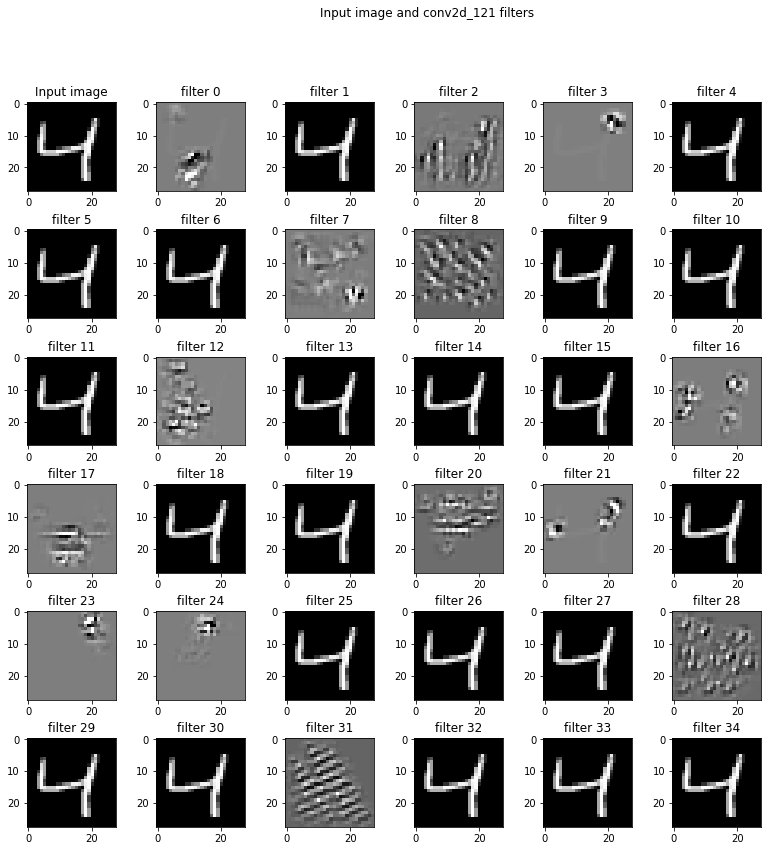

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_121'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()